# Functions

In [1]:
import networkx as nx
import numpy as np
import joblib
import h5py

import matplotlib.pyplot as plt
from matplotlib import pylab

from src.interact_with_matrices import find_degree_for_word, open_object
from src.matrix_reduce import reduce_dimension_adjacency_matrix

In [2]:
def plot_graph(graph, keys): 
    
    labels = {k:v for k,v in zip(range(len(keys)), keys)}
    
    plt.figure(num=None, figsize=(40, 40), dpi=80)
    plt.axis('off')
    fig = plt.figure(1)
    pos = nx.spring_layout(graph)
        
    nx.draw_networkx_nodes(
        graph, 
        pos
    )
    nx.draw_networkx_edges(
        graph, 
        pos,
        alpha=0.2
    )
    nx.draw_networkx_labels(
        graph, 
        pos, 
        labels,
        font_color='blue'
    )

    plt.show()

# Loading data

In [3]:
degree_matrix = open_object('data/degree_matrix.hdf5')
adjacency_matrix = open_object('data/adjacency_matrix.hdf5')

In [4]:
with open('data/keys.pkl', 'rb') as infile:
    keys = joblib.load(infile)

In [5]:
adjacency_matrix, degree_matrix, keys = reduce_dimension_adjacency_matrix(
    adjacency_matrix,
    degree_matrix,
    keys,
    threshold=20
)

In [6]:
G = nx.from_numpy_matrix(adjacency_matrix, create_using=nx.MultiDiGraph())

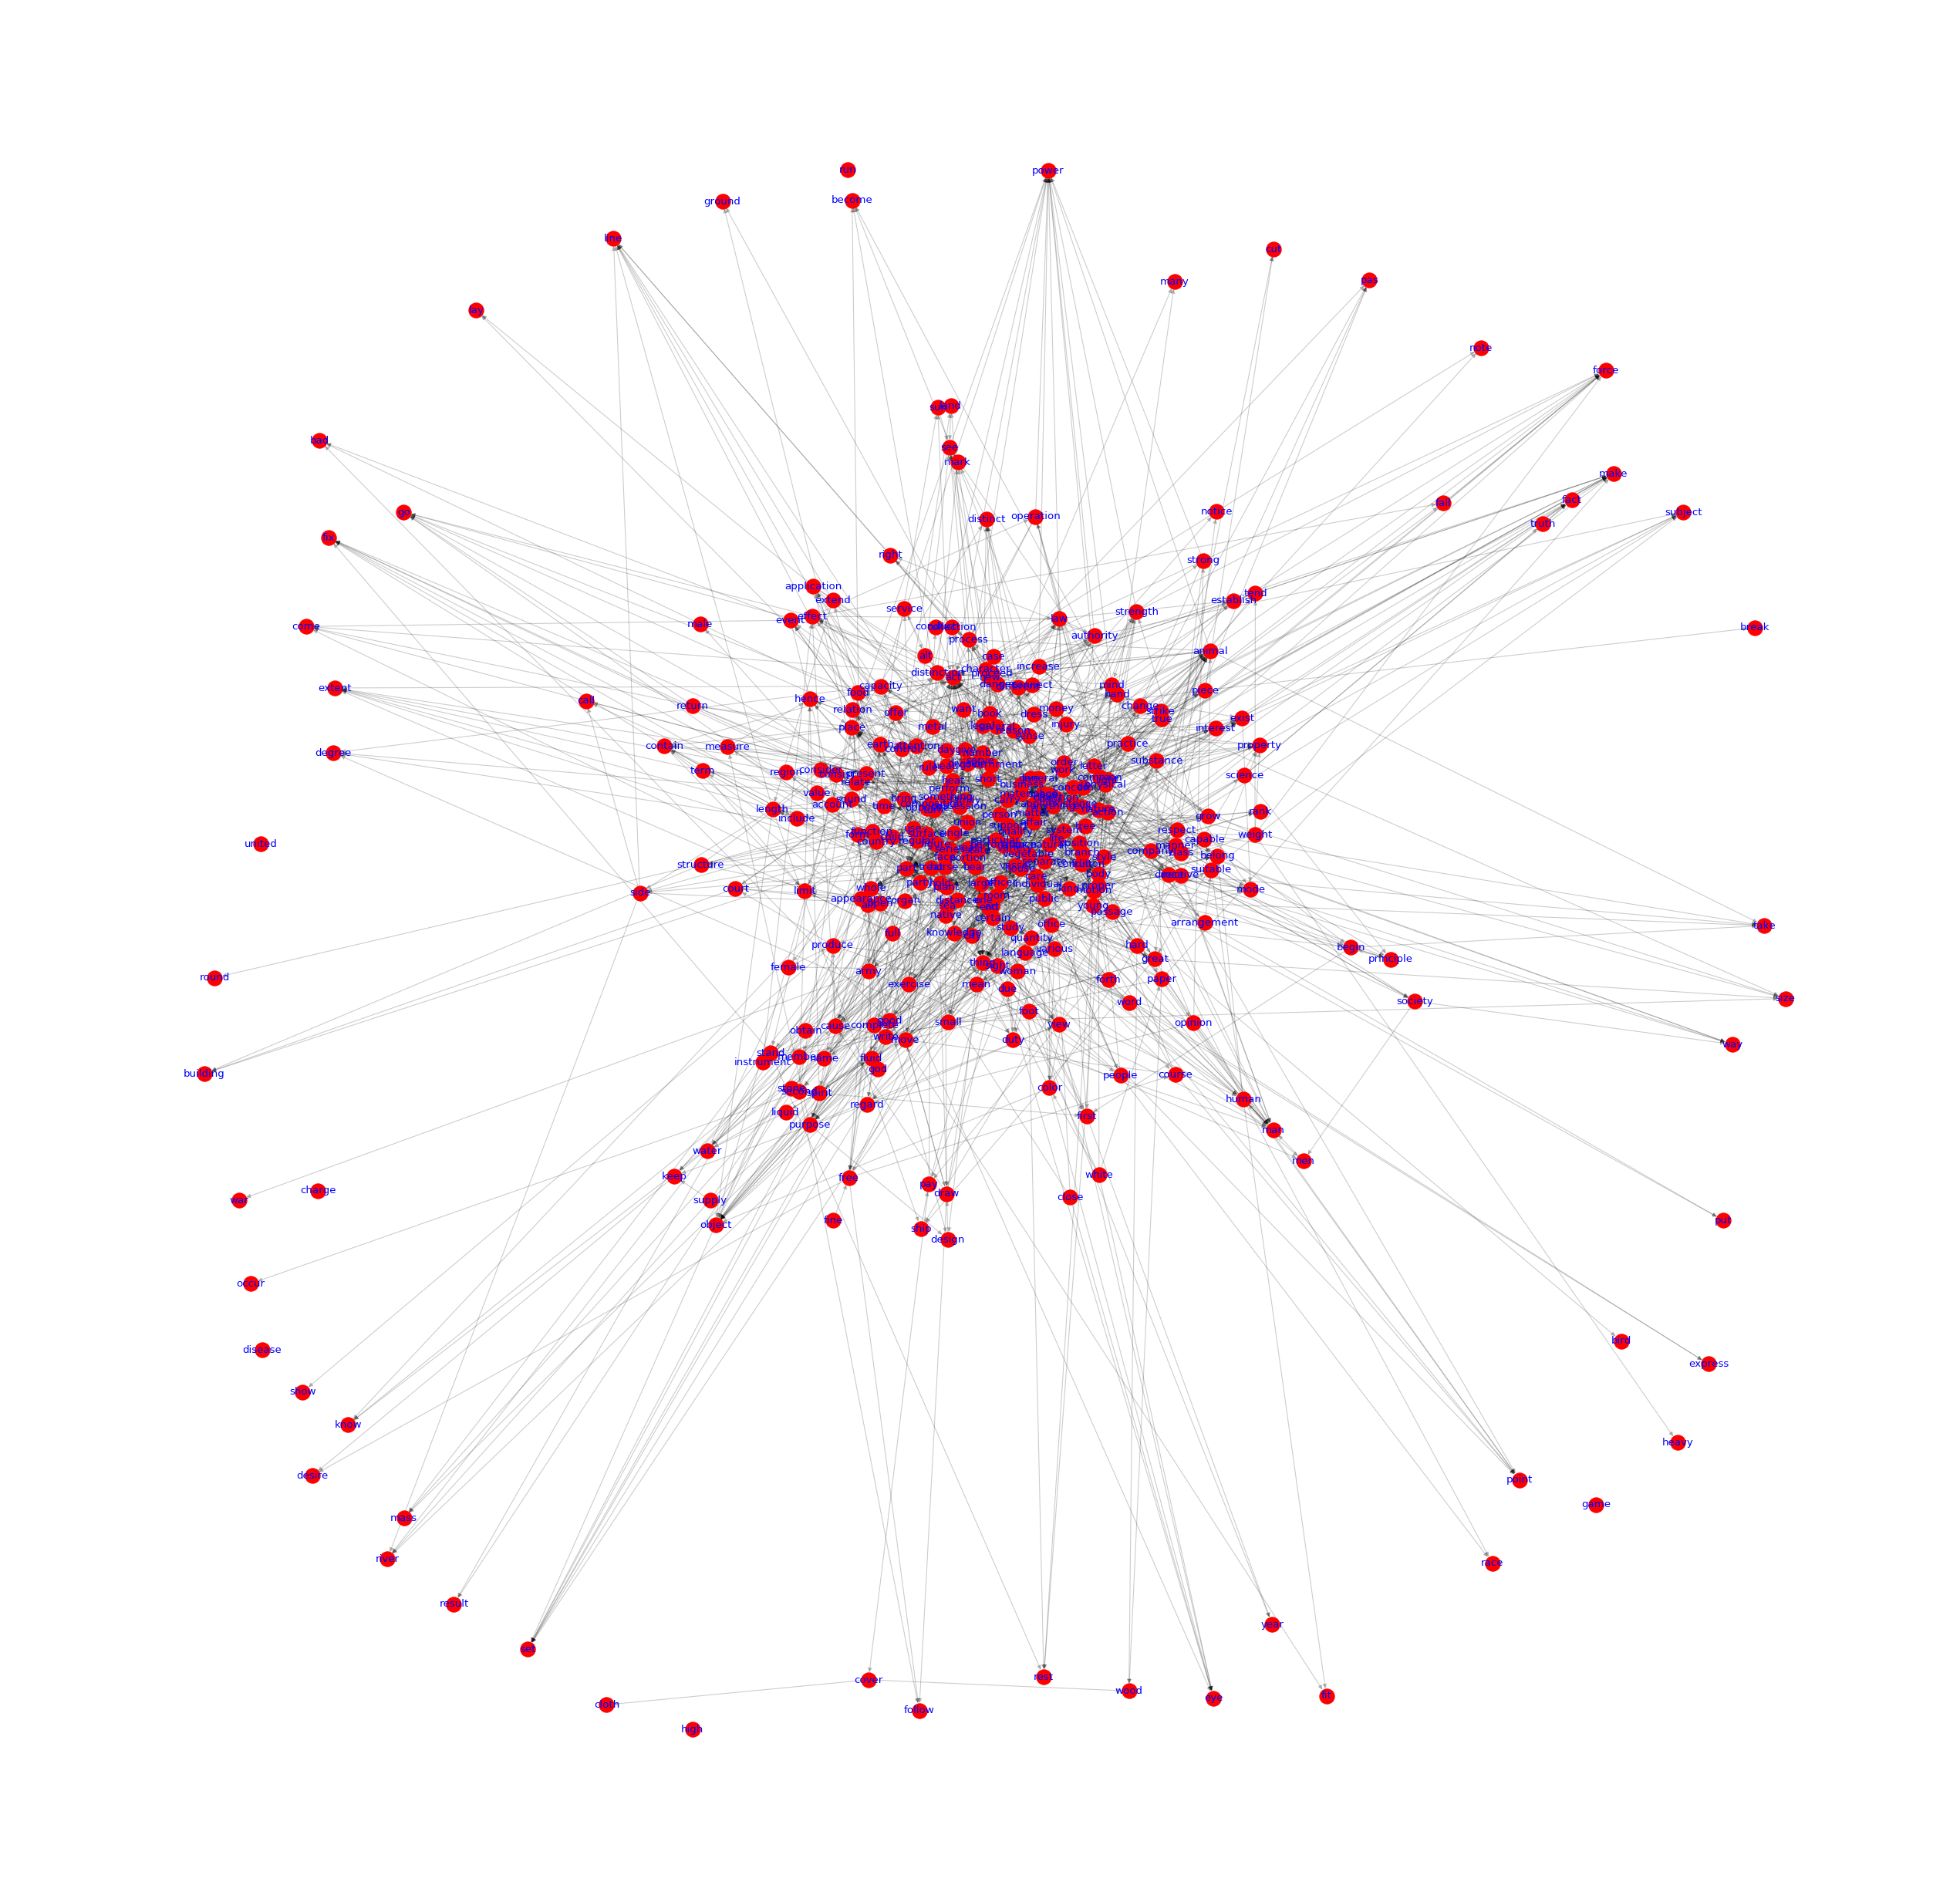

In [7]:
plot_graph(G, keys)

## Toy example

In [ ]:
G = nx.petersen_graph()

In [ ]:
G.edges

In [ ]:
plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')